In [64]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import table

In [66]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [67]:
engine = create_engine("sqlite:///DC_working_files/tv_data.sqlite")

## Explore Database

In [68]:
inspector = inspect(engine)
inspector.get_table_names()

['TvShows']

In [69]:
columns = inspector.get_columns('TvShows')
for c in columns:
    print(c['name'], c["type"])

index BIGINT
Unnamed: 0 BIGINT
Title TEXT
Year BIGINT
Age TEXT
IMDb FLOAT
Rotten Tomatoes TEXT
Netflix BIGINT
Hulu BIGINT
Prime Video BIGINT
Disney BIGINT
Popularity FLOAT
ID FLOAT
TMDB Rating FLOAT
Rating Count FLOAT
Last Episode Rating FLOAT
Last Air Date TEXT
First Air Date TEXT
# of Seasons FLOAT
# of Episodes FLOAT
Genre TEXT
Language TEXT
Country TEXT
In Production BOOLEAN
Origin Network TEXT
Similar1 TEXT
Similar2 TEXT


In [70]:
conn = engine.connect()

In [71]:
r = conn.execute("SELECT * FROM TvShows LIMIT 4;")

In [72]:
for row in r:
    print(row)
    #break

(0, 0, 'Breaking Bad', 2008, '18+', 9.5, '96%', 1, 0, 0, 0, 217.196, 1396.0, 8.6, 5478.0, 9.094, '9/29/2013', '1/20/2008', 5.0, 62.0, 'Drama', 'en', 'US', 0, 'AMC', 'Narcos', 'Weeds')
(1, 1, 'Stranger Things', 2016, '16+', 8.8, '93%', 1, 0, 0, 0, 185.468, 66732.0, 8.5, 5502.0, 8.8, '7/4/2019', '7/15/2016', 3.0, 25.0, 'Mystery', 'en', 'US', 1, 'Netflix', 'グレイプニル', 'ひぐらしのなく頃に')
(2, 2, 'Money Heist', 2017, '18+', 8.4, '91%', 1, 0, 0, 0, 306.686, 71446.0, 8.4, 9208.0, 7.0, '4/3/2020', '5/2/2017', 2.0, 31.0, 'Crime', 'es', 'ES', 1, 'Netflix', 'Firefly', 'This Is Us')
(3, 3, 'Sherlock', 2010, '16+', 9.1, '78%', 1, 0, 0, 0, 72.346, 19885.0, 8.4, 2375.0, 7.2860000000000005, '1/15/2017', '7/25/2010', 4.0, 12.0, 'Crime', 'en', 'GB', 0, 'BBC One', 'Death in Paradise', 'The Outsider')


 ## Most Popular Titles

In [74]:
# Query TVShows for `Title` and `Popularity`, and save the query into results.
r = conn.execute("SELECT Title, Popularity, IMDb FROM TvShows ORDER BY Popularity DESC LIMIT 12;").fetchall()

In [75]:
df = pd.DataFrame(r, columns=['Title', 'Popularity', 'IMDb'])
df=df.drop(df.index[[3]])

In [76]:
df

,Title,Popularity,IMDb
0,The Boys,2489.141,8.7
1,Lucifer,1681.214,8.2
2,The 100,463.890,7.7
4,Good Doctor,430.034,8.1
5,The Umbrella Academy,413.793,7.9
6,Dark,381.153,8.7
7,Supernatural,365.054,8.4
8,Grey's Anatomy,338.011,7.6
9,The Flash,323.644,7.7
10,Money Heist,306.686,8.4


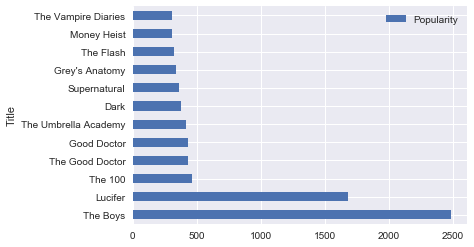

In [57]:
## Graph the results
df.plot.barh('Title', 'Popularity')

 ## Most Rated Titles

In [14]:
# Query TVShows for `Title` and `Rating Count`, and save the query into results.
r = conn.execute("SELECT Title, `Rating Count` FROM TvShows ORDER BY `Rating Count` DESC LIMIT 10;").fetchall()

In [15]:
df = pd.DataFrame(r, columns=['Title', 'Rating Count'])

In [16]:
df

,Title,Rating Count
0,Money Heist,9208.0
1,The Walking Dead,7500.0
2,The Flash,5553.0
3,Stranger Things,5502.0
4,Stranger,5502.0
5,Breaking Bad,5478.0
6,Riverdale,5028.0
7,Lucifer,4799.0
8,Elite,4624.0
9,The Good Doctor,4563.0


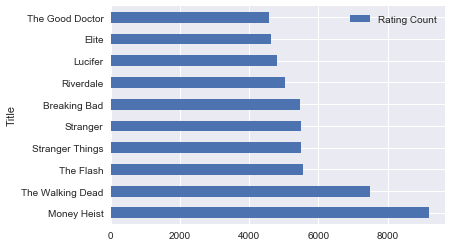

In [17]:
#Graph the results
df.plot.barh('Title', 'Rating Count')

## Most Popular on Netflix

In [18]:
col_names = [c['name'] for c in columns]
#col_names

In [19]:
# Only Netflix SQL Query
r = conn.execute("SELECT * FROM TvShows;").fetchall()
df = pd.DataFrame(r, columns=col_names)

In [20]:
# Only Netflix SQL Query
r = conn.execute("SELECT * FROM TvShows WHERE Netflix=1 ORDER BY Popularity DESC LIMIT 10;").fetchall()
df = pd.DataFrame(r, columns=col_names)
df

,index,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,First Air Date,# of Seasons,# of Episodes,Genre,Language,Country,In Production,Origin Network,Similar1,Similar2
0,33,33,Lucifer,2016,16+,8.2,87%,1,0,0,...,1/25/2016,5.0,75.0,Crime,en,US,1,FOX,Batman,Wonder Woman
1,40,40,The 100,2014,16+,7.7,92%,1,0,0,...,3/19/2014,7.0,100.0,Sci-Fi & Fantasy,en,US,1,The CW,Pretty Little Liars,A Series of Unfortunate Events
2,72,72,The Umbrella Academy,2019,16+,7.9,77%,1,0,0,...,2/15/2019,2.0,20.0,Action & Adventure,en,US,1,Netflix,Batwoman,Raising Dion
3,11,11,Dark,2017,16+,8.7,94%,1,0,0,...,12/1/2017,3.0,26.0,Sci-Fi & Fantasy,de,DE,0,Netflix,Unsolved Mysteries,Broadchurch
4,7,7,Supernatural,2005,16+,8.4,93%,1,0,0,...,9/13/2005,15.0,327.0,Drama,en,US,1,The WB,夏目友人帳,青の祓魔師
5,35,35,Grey's Anatomy,2005,16+,7.6,83%,1,1,0,...,3/27/2005,16.0,362.0,Drama,en,US,1,ABC,Chicago Hope,Saving Hope
6,30,30,The Flash,2014,7+,7.7,89%,1,0,0,...,10/7/2014,7.0,133.0,Drama,en,US,1,The CW,Batman,Wonder Woman
7,2,2,Money Heist,2017,18+,8.4,91%,1,0,0,...,5/2/2017,2.0,31.0,Crime,es,ES,1,Netflix,Firefly,This Is Us
8,38,38,The Vampire Diaries,2009,7+,7.7,85%,1,0,0,...,9/10/2009,8.0,171.0,Drama,en,US,0,The CW,Shadowhunters,Penny Dreadful
9,383,383,Special,2019,18+,7.6,95%,1,0,0,...,9/20/1999,22.0,479.0,None,en,US,1,NBC,Law & Order,Kojak


#### Most Rated on Rotten Tomatoes

In [21]:
# Query TVShows for `Rotten Tomatoes`. 
r = conn.execute("SELECT * FROM TvShows ORDER BY `Rotten Tomatoes` DESC LIMIT 10;").fetchall()
df = pd.DataFrame(r, columns=col_names)
df

,index,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,First Air Date,# of Seasons,# of Episodes,Genre,Language,Country,In Production,Origin Network,Similar1,Similar2
0,74,74,Ash vs Evil Dead,2015,18+,8.4,99%,1,0,0,...,10/31/2015,3.0,30.0,Action,en,US,0,Starz,DEVILMAN crybaby,大王不高兴
1,129,129,One Day at a Time,2017,7+,8.2,99%,1,0,0,...,12/16/1975,9.0,210.0,Comedy,en,US,0,CBS,Younger,Raven's Home
2,136,136,Alias Grace,2017,18+,7.8,99%,1,0,0,...,9/25/2017,1.0,6.0,Crime,en,CA,0,CBC Television,The Alienist,Jane Eyre
3,2002,2002,Younger,2015,16+,7.8,99%,0,1,0,...,3/31/2015,6.0,72.0,None,en,US,1,TV Land,2 Broke Girls,The Mindy Project
4,2006,2006,Broad City,2014,18+,8.4,99%,0,1,0,...,1/22/2014,5.0,50.0,None,en,US,0,Comedy Central,2 Broke Girls,Younger
5,97,97,The Vietnam War,2017,18+,9.1,98%,1,0,0,...,9/17/2017,1.0,10.0,Documentary,en,US,0,PBS,The Wonder Years,American Experience
6,143,143,Wild Wild Country,2018,16+,8.2,98%,1,0,0,...,3/16/2018,1.0,6.0,Documentary,en,US,0,Netflix,Unsolved Mysteries,The Following
7,201,201,Crazy Ex-Girlfriend,2015,16+,7.8,98%,1,0,0,...,10/12/2015,4.0,61.0,None,en,US,0,The CW,Glee,Psych
8,268,268,Nailed It!,2018,7+,7.4,98%,1,0,0,...,3/9/2018,4.0,27.0,None,en,US,1,Netflix,MasterChef Australia,MasterChef
9,269,269,Last Tango in Halifax,2012,16+,8.3,98%,1,0,0,...,11/20/2012,5.0,24.0,None,en,GB,1,BBC One,The Bachelor,エンジェルビーツ!
